# Digital Talent Scholarship 2020 
# Challenge 2 - IMDB Movie Reviews 
# Data Scientist D - Kelompok 2 : 

  1. Adinda Maharani - Teknik Elektro - 015192512011
  2. Garias Devara - Teknik Material - 015192512160
  3. Johannes Silaban - Ilmu Geologi - 015192512155
  4. Yunita - Teknik Informatika - 01519251201

**Import Dataset dari drive**

In [ ]:
from google.colab import drive
drive.mount ('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
path = '/content/drive/My Drive/Colab Notebooks/datasets/IMDB_Dataset.csv'
df = pd.read_csv(path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Melihat jumlah data dalam dataset**

In [ ]:
df.shape

(50000, 2)

In [ ]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

**Identifikasi missing data dalam dataset**

In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

# Preprocessing Data

**Install library nltk (Natural Language Toolkit) untuk preprocessing data yang berupa text**

In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata

#Tokenization text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

**Menghilangkan strip html dan noise pada text**

In [ ]:
# Menghilangkan html strips 
def strip_html(text):
  soup = BeautifulSoup(text, 'html.parser')
  return soup.get_text()

# Menghilangkan square brackets
def remove_between_square_brackets(text):
  return re.sub('\[[^]]*\]', '', text)

# Menghilangkan noise text
def denoise_text(text):
  text = strip_html(text)
  text = remove_between_square_brackets(text)
  return text

# Mengaplikasikan fungsi pada kolom review
df['review'] = df['review'].apply(denoise_text)


**Menghilangkan karakter spesial (simbol-simbol) pada text**

In [ ]:
# Define fungsi untuk menghilangkan karakter spesial
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

# Mengaplikasikan fungsi pada kolom review
df['review']=df['review'].apply(remove_special_characters)

**Text stemming**

In [ ]:
# Define fungsi untuk text stemming
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
# Mengaplikasikan fungsi pada kolom review
df['review']=df['review'].apply(simple_stemmer)

**Menghilangkan Stopwords**

In [ ]:
# Set stopwords ke Bahasa Inggris
stop=set(stopwords.words('english'))
print(stop)

# Definisi fungsi menghilangkan stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

# Mengaplikasikan fungsi pada kolom review
df['review']=df['review'].apply(remove_stopwords)

{'yourselves', 'below', 'will', 'why', 'they', 'now', 'wasn', 'once', 'which', 'it', 'just', 'should', 'too', 'her', 'shouldn', 'do', "hadn't", 'couldn', 'don', 'on', 'hers', 'i', 'd', 'am', 'hadn', 'hasn', 'him', 'through', "won't", "she's", 'any', 'm', 'most', 'some', 'shan', 'so', 'between', 'no', 'mightn', 'all', 'who', 'himself', 'yours', 'are', 'his', 'was', 'y', "weren't", "you'll", 'whom', 'during', 'from', 'own', 'being', 'needn', 'we', 'an', 'myself', 've', "it's", 'its', "haven't", 'mustn', 'she', 'than', 'weren', "don't", 'until', 'under', 'that', "hasn't", 'not', 'a', 'same', 'of', 'very', "wouldn't", 's', "that'll", 'for', 'but', 'theirs', 'over', "needn't", 'aren', 'been', 'other', 'has', 'ain', 'yourself', 'while', 'after', 'can', 'before', 'doesn', 'wouldn', "you're", 'down', "wasn't", 'only', 'about', 'here', 'herself', "doesn't", 'above', 'this', 'or', 'o', "shouldn't", 'such', 'haven', 'again', 'their', "should've", 'further', 'having', 'what', 'your', 'in', 'there'

**Splitting dataset**

In [ ]:
# Train dataset
train_reviews=df.review[:40000]
train_sentiments=df.sentiment[:40000]

# Test dataset
test_reviews=df.review[40000:]
test_sentiments=df.sentiment[40000:]

print(train_reviews.shape, train_sentiments.shape)
print(test_reviews.shape, test_reviews.shape)

(40000,) (40000,)
(10000,) (10000,)


In [ ]:
norm_train_reviews=df.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 Oz episod youll hook right thi exactli happen meth first thing struck Oz wa brutal unflinch scene violenc set right word GO trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call OZ nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda Em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast Oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [ ]:
norm_test_reviews=df.review[40000:]
norm_test_reviews[45500]

'thi wa one first creepi movi ever sawi wa 5 time scare good night put chew gum one eye like monsterand mom got veri upset clean eye alcohol next day eye smell like doubl mint movi hey time wa great movi head sit lab counter top wa real got back 5 veri scari kid day spoil special effect show much leav noth mind imagin mind imagin thing scarier special effect imo'

# Data Modelling

Dalam text analysis, terdapat 2 model yang biasanya digunakan yaitu: \
**Bag of Words** & **TFIDF**

**Bag of Words** digunakan untuk konversi teks menjadi vektor numerik. \

Sedangkan, **TFIDF** (Term Frequency-Inverse Document Frequency Model) digunakan untuk konversi teks menjadi matriks.

Untuk lebih jelasnya, bisa berkunjung ke halaman berikut [ini](https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/)

**Import Libraries untuk modelling:**

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

**Bag of Words Model**

In [ ]:
# Menghitung vectorizer untuk model Bag of Words
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

# Transformasi train reviews
cv_train_reviews = cv.fit_transform(norm_train_reviews)

# Transformasi test reviews
cv_test_reviews = cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 6209089)
BOW_cv_test: (10000, 6209089)


**TFIDF Model**

In [ ]:
# TFIDF vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

# Transformasi train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)

# Transformasi test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6209089)
Tfidf_test: (10000, 6209089)


**Labelling Sentiment Text**

In [ ]:
# Labeling sentiment data
lb=LabelBinarizer()

# Transformasi sentiment data
sentiment_data=lb.fit_transform(df['sentiment'])
print(sentiment_data.shape)

(50000, 1)


**Split Sentiment Data**

In [ ]:
# Spliting sentiment data
train_sentiments = sentiment_data[:40000]
test_sentiments = sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


**Logistic Regression Model** untuk **Bag of Words** dan **TFIDF**

In [ ]:
# Training model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=27)

# Fitting model untuk Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)

# Fitting model untuk TFIDF features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=27, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=27, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# Prediksi model untuk bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
# Prediksi model untuk TFIDF 
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


**Perhitungan akurasi dari model Logistic Regression**

In [ ]:
# Accuracy score untuk bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("Akurasi Bag of Words dengan Logistic Regression :",lr_bow_score)

# Accuracy score untuk TFIDF 
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("Akurasi TFIDF dengan Logistic Regression :",lr_tfidf_score)

Akurasi Bag of Words dengan Logistic Regression : 0.7512
Akurasi TFIDF dengan Logistic Regression : 0.75


**Classification Report model Logistic Regression untuk Bag of Words**

In [ ]:
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



**Classification Report model Logistic Regression untuk TFIDF**

In [ ]:
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



**Confusion Matrix untuk Logistic Regression Model**

In [ ]:
# Confusion matrix untuk bag of words
cm_bow = confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print('Confusion Matrix Model Logistic Regression untuk Bag of Words: \n',cm_bow)

# Confusion matrix untuk TFIDF
cm_tfidf = confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print('Confusion Matrix Model Logistic Regression untuk TFIDF: \n',cm_tfidf)

Confusion Matrix Model Logistic Regression untuk Bag of Words: 
 [[3768 1239]
 [1249 3744]]
Confusion Matrix Model Logistic Regression untuk TFIDF: 
 [[3663 1344]
 [1156 3837]]


**Multinomial Naive Bayes Model** untuk 
**Bag of Words** dan **TFIDF**

In [ ]:
# Training model
mnb=MultinomialNB()

# Fitting model untuk bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)

# Fitting model untuk TFIDF
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [ ]:
# Prediksi model untuk bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)

# Prediksi model untuk TFIDF
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


**Perhitungan akurasi dari model  Multinomial Naive Bayes**

In [ ]:
# Accuracy score untuk bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("Akurasi Bag of Words dengan Multinomial Naive Bayes :",mnb_bow_score)

# Accuracy score untuk tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("Akurasi TFIDF dengan Multinomial Naive Bayes :",mnb_tfidf_score)

Akurasi Bag of Words dengan Multinomial Naive Bayes : 0.751
Akurasi TFIDF dengan Multinomial Naive Bayes : 0.7509


**Classification Report model Multinomial Naive Bayes untuk Bag of Words**

In [ ]:
# Classification report untuk bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



**Classification Report model Multinomial Naive Bayes untuk TFIDF**

In [ ]:
# Classification report untuk TFIDF
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



**Confusion Matrix untuk Model Multinomial Naive Bayes**

In [ ]:
# Confusion matrix untuk bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print('Confusion Matrix Model Multinomial Naive Bayes untuk Bag of Words: \n',cm_bow)
# Confusion matrix untuk TFIDF
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print('Confusion Matrix Model Multinomial Naive Bayes untuk TFIDF: \n',cm_tfidf)

Confusion Matrix Model Multinomial Naive Bayes untuk Bag of Words: 
 [[3736 1271]
 [1219 3774]]
Confusion Matrix Model Multinomial Naive Bayes untuk TFIDF: 
 [[3729 1278]
 [1213 3780]]


**Support Vector Machines Model** untuk 
**Bag of Words** dan **TFIDF**

In [ ]:
# Training model SVM
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=27)
# Fitting model SVM untuk bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)

# Fitting model SVM untuk TFIDF
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=27, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=27, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
# Prediksi model SVM untuk bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
# Prediksi model SVM untuk TFIDF
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


**Perhitungan akurasi dari model Support Vector Machine**

In [ ]:
# Accuracy score untuk bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("Akurasi Bag of Words dengan Support Vector Machine :",svm_bow_score)

# Accuracy score untuk TFIDF
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("Akurasi TFIDF dengan Support Vector Machine :",svm_tfidf_score)

Akurasi Bag of Words dengan Support Vector Machine : 0.5088
Akurasi TFIDF dengan Support Vector Machine : 0.4993


**Classification Report model Support Vector Machine untuk Bag of Words**

In [ ]:
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)

              precision    recall  f1-score   support

    Positive       0.50      1.00      0.67      4993
    Negative       1.00      0.02      0.04      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.35     10000
weighted avg       0.75      0.51      0.35     10000



**Classification Report model Support Vector Machine untuk TFIDF**

In [ ]:
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.50      1.00      0.67      4993
    Negative       0.00      0.00      0.00      5007

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Confusion Matrix untuk Model Support Vector Machine**

In [ ]:
# Confusion matrix untuk bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print('Confusion Matrix Model SVM untuk Bag of Words: \n',cm_bow)
# Confusion matrix untuk TFIDF
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print('Confusion Matrix Model SVM untuk TFIDF: \n',cm_tfidf)

Confusion Matrix Model SVM untuk Bag of Words: 
 [[  95 4912]
 [   0 4993]]
Confusion Matrix Model SVM untuk TFIDF: 
 [[   0 5007]
 [   0 4993]]


# Visualisasi kata-kata dengan sentimen positif dan negatif menggunakan WordCloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

**Word cloud pada review yang sentimennya positif**

<function matplotlib.pyplot.show>

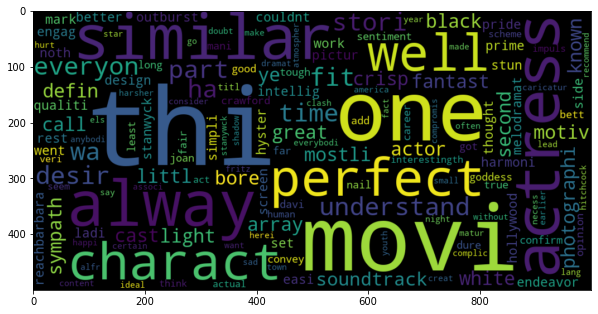

In [ ]:
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[56]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

**Word cloud pada review yang sentimennya negatif**

<function matplotlib.pyplot.show>

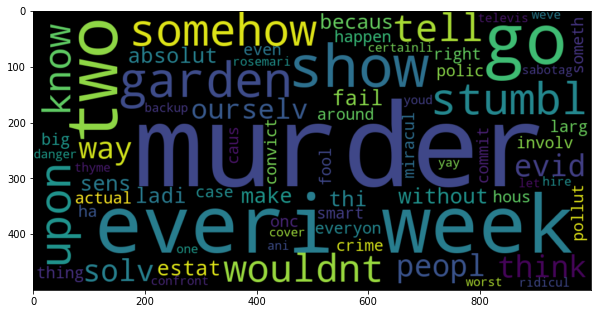

In [ ]:
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[45]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [ ]:
df2.to_csv(r'/content/drive/My Drive/Colab Notebooks/datasets/IMDB_Dataset_Sample.csv')